In [17]:
from __future__ import print_function, division
import numpy as np
import emcee
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
sample = 'sample_3'
_temp = __import__(sample+'_fitting_params')
params = _temp.params

nwalkers = params['nwalkers']
mag_lim = params['mag_lim']

In [19]:
reader = emcee.backends.HDFBackend("chains/"+sample+"_chain.hdf5")
data = reader.get_chain()

nsteps = len(data)
print(nsteps, nwalkers)

46 100


In [20]:
p1 = data.T[0]
p2 = data.T[1]
p3 = data.T[2]
p4 = data.T[3]
p5 = data.T[4]
p6 = data.T[5]
p7 = data.T[6]
p8 = data.T[7]
p9 = data.T[8]

In [21]:
print(np.percentile(p1[:,-1],[16, 50, 84]))
print(np.percentile(p2[:,-1],[16, 50, 84]))
print(np.percentile(p3[:,-1],[16, 50, 84]))
print(np.percentile(p4[:,-1],[16, 50, 84]))
print(np.percentile(p5[:,-1],[16, 50, 84]))
print(np.percentile(p6[:,-1],[16, 50, 84]))
print(np.percentile(p7[:,-1],[16, 50, 84]))
print(np.percentile(p8[:,-1],[16, 50, 84]))
print(np.percentile(p9[:,-1],[16, 50, 84]))

[0.10645834 0.10710473 0.10739619]
[0.79950132 0.79994112 0.80025867]
[0.08755132 0.08802727 0.08821901]
[0.0745408  0.07496733 0.07519442]
[0.16610097 0.16669205 0.16697122]
[0.39946975 0.40004539 0.40038216]
[0.10257088 0.10322414 0.103567  ]
[0.19951831 0.19997063 0.20033072]
[0.67094802 0.67133518 0.67184871]


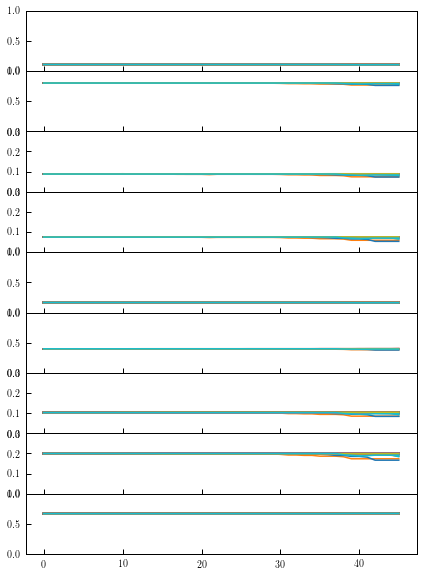

In [22]:
fig, axes = plt.subplots(9, 1, figsize=(7.0,10.0))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(0,nwalkers):
    axes[0].plot(p1[i])
axes[0].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[1].plot(p2[i])
axes[1].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[2].plot(p3[i])
axes[2].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[3].plot(p4[i])
axes[3].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[4].plot(p5[i])
axes[4].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[5].plot(p6[i])
axes[5].set_ylim([0,1])

for i in range(0,nwalkers):
    axes[6].plot(p7[i])
axes[6].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[7].plot(p8[i])
axes[7].set_ylim([0,0.3])

for i in range(0,nwalkers):
    axes[8].plot(p9[i])
axes[8].set_ylim([0,1])

plt.show()

In [23]:
from make_mock import make_galaxy_sample

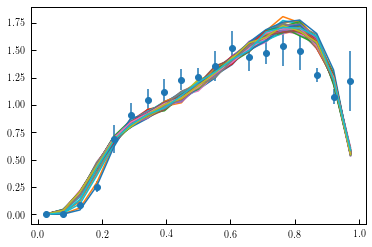

In [24]:
from astropy.table import Table
t_1 = Table.read('../data/'+sample+'_shapes.dat', format='ascii')

for i in range(nwalkers):
    j = -1 
    d = {'disk_shape_mu_1_centrals': p1[i,j],
         'disk_shape_mu_2_centrals': p2[i,j],
         'disk_shape_sigma_1_centrals': p3[i,j],
         'disk_shape_sigma_2_centrals': p4[i,j],
         'elliptical_shape_mu_1_centrals': p5[i,j],
         'elliptical_shape_mu_2_centrals': p6[i,j],
         'elliptical_shape_sigma_1_centrals': p7[i,j],
         'elliptical_shape_sigma_2_centrals': p8[i,j],
         'f_disk': p9[i,j]}
    
    mock = make_galaxy_sample(mag_lim=mag_lim,**d)
    
    # measure shape distribution
    bins = np.linspace(0,1,20)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    mag_key = 'obs_Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    x = mock['galaxy_projected_b_to_a']
    counts = np.histogram(x[mask], bins=bins)[0]
    counts = 1.0*counts/np.sum(mask)/np.diff(bins)
    
    plt.plot(bin_centers, counts)
plt.errorbar(t_1['q'],t_1['frequency'],t_1['err'], fmt='o')
plt.show()

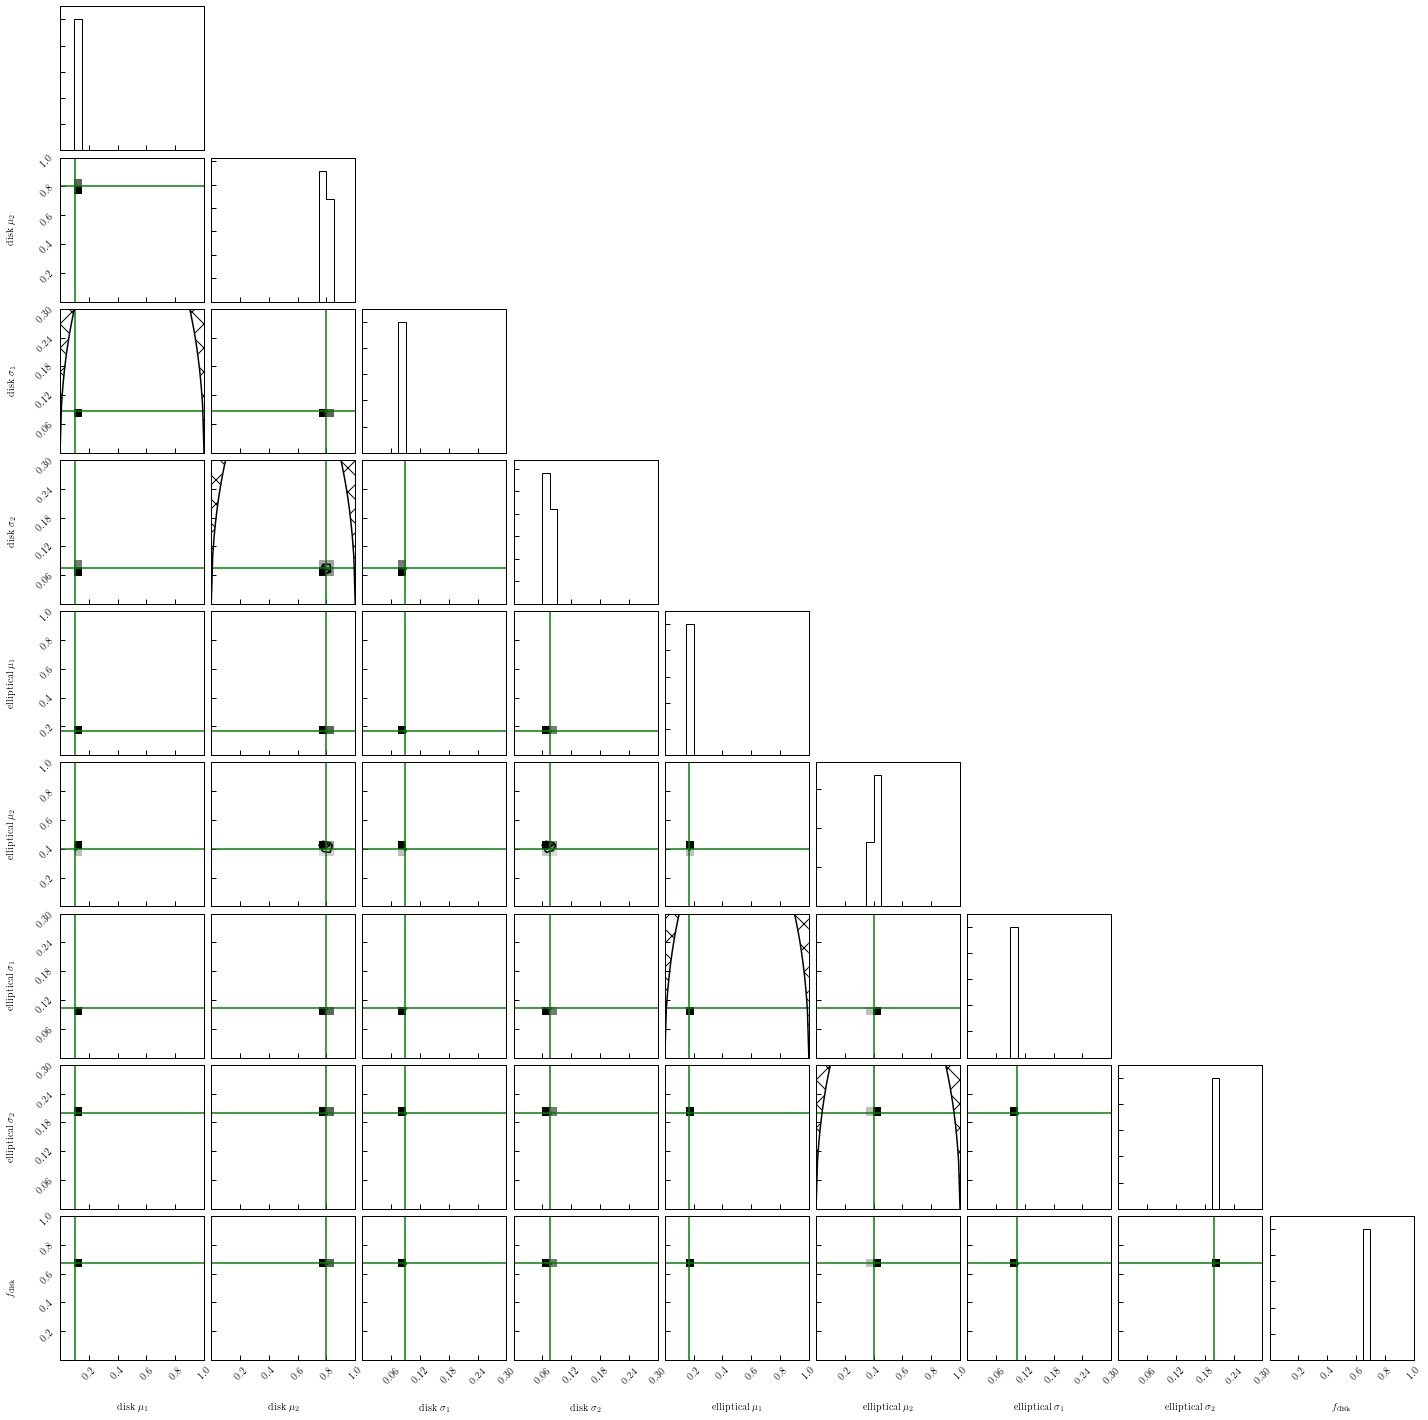

In [14]:
samples = data.T[:,:,-1].T

ranges = [(0,1),(0,1),(0,.3),(0,.3),(0,1),(0,1),(0,.3),(0,.3),(0,1)]
names = ['disk ' + r'$\mu_1$','disk ' + r'$\mu_2$','disk ' + r'$\sigma_1$','disk ' + r'$\sigma_2$',
         'elliptical ' + r'$\mu_1$','elliptical ' + r'$\mu_2$','elliptical ' + r'$\sigma_1$','elliptical ' + r'$\sigma_2$',
         r'$f_{\rm disk}$']

import corner
fig = corner.corner(samples, range=ranges, labels=names)

ndim = 9

# Extract the axes
axes = np.array(fig.axes).reshape((ndim, ndim))

for yi in range(ndim):
    for xi in range(yi):
        ax = axes[yi, xi]
        x,y = params['theta0'][xi], params['theta0'][yi]
        ax.axvline(x, color="g")
        ax.axhline(y, color="g")
        ax.plot(x,y,"g")

# show not allowed regions
xx = np.linspace(0,1,100) # mu
yy = np.sqrt((xx*(1.0-xx))) # sigma
        
ax = axes[2, 0]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

ax = axes[3, 1]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

ax = axes[6, 4]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

ax = axes[7, 5]
ax.plot(xx,yy,color='black')
ax.fill_between(xx, yy, yy*0.0 + 1.0, hatch="X", facecolor='none', linewidth=0.0)

plt.show()

In [16]:
np.shape(samples)

(100, 9)